# PROTOTYPE
### Pulling financial data based on a ticker defined by user

#### First run the imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
import os
import time

#### Run this cell too please :D

This defines the function that pulls financial data. You may need to create a folder called "Income" in your directory

In [4]:
def income_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Income%20Statement&sort=desc'
    response = requests.get(url)
    with open(os.path.join("Income", f"{ticker}_inc.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./Income/{ticker}_inc.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

#### Please run this cell and enter a ticker; let's see if it works!

Please enter a ticker: googl


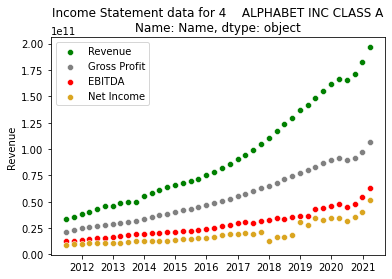

In [30]:
# user inputs a ticker, ensures upper-case letters
ticker = input('Please enter a ticker:')
ticker = ticker.upper()

#calls the function to pull income statement data
ticker_df = income_puller(ticker)

# not really necessary, pulls in the company name
# if the ticker isn't already in stock_list, the chart title will throw an error
stock_list = pd.read_csv('list_of_stocks.csv')
ticker_name = stock_list[stock_list['Ticker']==ticker]['Name']

sns.scatterplot(data=ticker_df,x=ticker_df.index,y='Revenue', color='green')
sns.scatterplot(data=ticker_df,x=ticker_df.index,y='Gross Profit', color='gray')
sns.scatterplot(data=ticker_df,x=ticker_df.index,y='EBITDA',color='red')
sns.scatterplot(data=ticker_df,x=ticker_df.index,y='Net Income Common', color='goldenrod')
plt.title(f'Income Statement data for {ticker_name}');
plt.legend(labels=['Revenue','Gross Profit','EBITDA','Net Income']);